<a href="https://colab.research.google.com/github/agrawalkunal2/RossmannSalesPrediction/blob/main/Final_Capstone2_Kunal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(20.0, 6.0))
import scipy.stats as stats

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = "/content/drive/MyDrive/Colab Notebooks/Capstone 2/"
rossman_df = pd.read_csv(path+"Rossmann Stores Data.csv")
store_df = pd.read_csv(path+"store.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Looking at the data

In [5]:
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
rossman_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


As observed above it contains the information pertaining to the store for the each day. The information contained is Store No, Day of the week, each date, sales on the given day, customers available on that day, whether the store was open on that day, if the store was participating on promo on that day and lastly whether on that day there was any state or school holiday.
<BR>
During look at tai we can observe that for few records there is 0 entry in sales

We have been given information in our problem set that few stores were closed pertaining to refurbishment. Also, we know that if the store is closed, there is no point of keeping it in our dataset.
<BR>
Let's check for closed stores

In [7]:
len(rossman_df[rossman_df['Open']==0])

172817

In [8]:
# checking if there was any sales made on stores if it was closed. If both are same we can delete those observations from oour dataset
len(rossman_df[(rossman_df['Open']==0) & (rossman_df['Sales']==0)])

172817

In [9]:
# deleting the data having Store as closed
rossman_df = rossman_df[rossman_df['Open']==1]

In [10]:
rossman_df.Open.value_counts()

1    844392
Name: Open, dtype: int64

As we can see that Open variable only contains single value. Thus we can delete this column

In [11]:
# deleting Open
rossman_df.drop(labels='Open', axis=1,inplace=True)

In [12]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [13]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


As observed above, there are 1115 Rossmann stoes located and this data contains the geniric information about the store such as the type and assortment of the store, information pertaining to its competitors such as distance and the time from which the competition was open, whether the store us participating in any promo and the same is active from when and along with that the month cycle on which promo runs

In [14]:
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844392 non-null  int64 
 1   DayOfWeek      844392 non-null  int64 
 2   Date           844392 non-null  object
 3   Sales          844392 non-null  int64 
 4   Customers      844392 non-null  int64 
 5   Promo          844392 non-null  int64 
 6   StateHoliday   844392 non-null  object
 7   SchoolHoliday  844392 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 58.0+ MB


As we can observe from above that there are no null values present in rossman_df ie the sales data. There are 6 numiric columns and 2 object columns

In [15]:
rossman_df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,844392,NaN,NaN,NaN,558.423,321.732,1,280,558,837,1115
DayOfWeek,844392,NaN,NaN,NaN,3.52036,1.72369,1,2,3,5,7
Date,844392,942,2015-06-09,1115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,844392,NaN,NaN,NaN,6955.51,3104.21,0,4859,6369,8360,41551
Customers,844392,NaN,NaN,NaN,762.728,401.228,0,519,676,893,7388
Promo,844392,NaN,NaN,NaN,0.446352,0.497114,0,0,0,1,1
StateHoliday,844392,5,0,731342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SchoolHoliday,844392,NaN,NaN,NaN,0.19358,0.395103,0,0,0,0,1


Few observations that we can make looking at the data above is that "Sales" is our dependent variable.
By looking at median(50%) and the mean we can see that Store, DayOfWeek are close to have normal ditribution with small amount of right skewness, however, Sales and Customer are are more positively skewed. We will anyways verify it during EDA
At first glance, it can be said that Store,DayOfWeek,Open,Promo,StateHoliday and SchoolHoliday are the categorical variables
Also, Sales,Customers are the numerical variables

In [16]:
# checking number of unique stores in the rossmann_df
rossman_df.Store.nunique()

1115

In [17]:
# finding unique counts
rossman_df.apply(lambda x: len(x.unique()))


Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [18]:
# shape of dataset
rossman_df.shape

(844392, 8)

In [19]:
# Will Check sales is less than 0 for any day. We expect that it should not be there
rossman_df[rossman_df['Sales'] < 0]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday


Now we will try to look at the other dataframe(store) and will try to figure out to join both dataframes

In [20]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [21]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [22]:
store_df.shape

(1115, 10)

As we can observe that, there are lot of null values in store dataframe, which we can asssume that it could be because the store is not participating in promos and there is no competition present in the vicinity of that store. However, we will try to check this out going forward.

In [23]:
# we observed that all the stores which are not participating in promotional offer have 0 in there Promo2 coloumn
store_df[store_df["Promo2"]!=0].shape[0]

571

o, it is confirmed that all the columns "Promo2SinceWeek","Promo2SinceYear","PromoInverval" is null for those columns which don't participate in promotional offers. During EDA, we will try to treat it.

In [24]:
# store_df[store_df["CompetitionDistance"]==np.nan]
np.where(pd.isnull(store_df['CompetitionDistance']))

(array([290, 621, 878]),)

There are 3 entries where Competition Distance is missing

Let's check if we can join rossman_df and sales_df by using Sales as common variable

In [25]:
# Converting Store values into sets and subtracting to see if they are equal or not 
set(pd.DataFrame(rossman_df['Store'].value_counts()).index.to_list()) - set(pd.DataFrame(store_df['Store'].value_counts()).index.to_list())

set()

So we got an empty set. As we can see from the above that Store is present in the both dataframes and Store is acting as unique identifier for store_df dataframe.<BR>
So we will try to merge both dataframes and will work on single dataframe containing all the necessary information

In [26]:
data = rossman_df.merge(store_df, on='Store',how='left')
print(rossman_df.shape)
print(data.shape)
#to cross check missing values present in our dataframe
print(data.isna().sum()) 

(844392, 8)
(844392, 17)
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
PromoInterval                423307
dtype: int64


In [27]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


**EDA**
<BR>
Following are the steps we will take for EDA: <BR>
Removing duplicates<BR>
Missing value treatment<BR>
Outlier Treatment<BR>
Normalizing and Scaling( Numerical Variables)<BR>
Encoding Categorical variables( Dummy Variables)<BR>
Bivariate Analysis

In [28]:
# finding out duplicate values in rossman_df
len(data[data.duplicated()])

0

So, our first assumption is matching, we don't have any duplicate data in our dataframe

**Missing Value Treatment:<br>**
We observed that for columns "Promo2SinceWeek", "Promo2SinceYear", "PromoInverval", it has null values as these stores don't take part in promotional activities. We will impute 0 in case of Promo2SinceWeek, Promo2SinceYear and PromoInterval. 

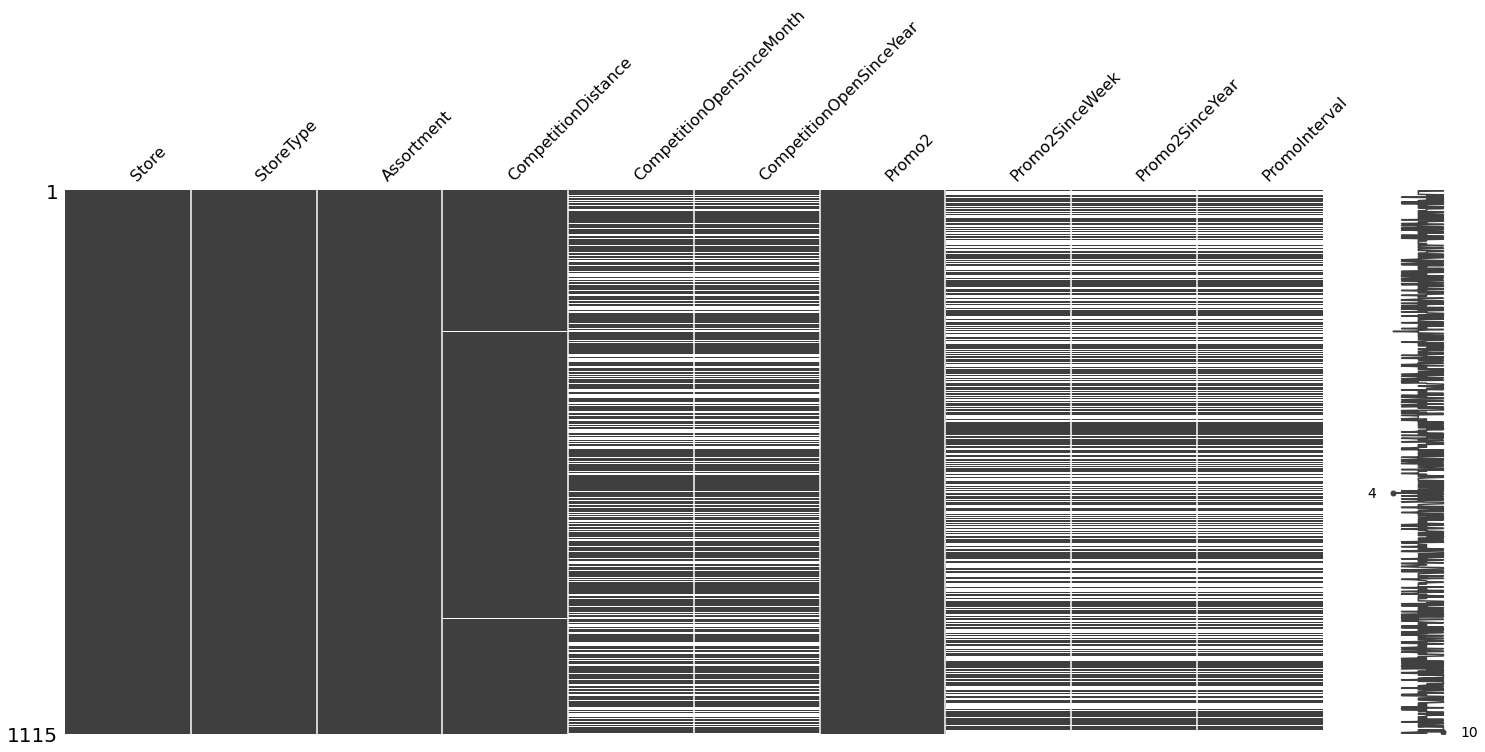

In [29]:
# trying to identify pattern in null values in store_df
import missingno as msno
msno.matrix(store_df)

Few information that we can gather over here:


*   For Promo2SinceWeek, Promo2SinceYear and PromoInterval we can observe the pattern, it has the same rows where null value is present, hence, we can say that it is null only for those observations where stores don't take part in promos
*   For Competition distance there are 3 null values for which we are unable to observe any pattern
* For CompetitionOpenSinceMonth and CompetitionOpenSinceYear there is clear pattern and have null values for the same observations



We will be confirming this information:<BR>
Checking for promo

In [30]:
len(data[(data['Promo2'] == 1) & (data['Promo2SinceWeek'].isna())])

0

In [31]:
len(data[(data['Promo2'] == 1) & (data['Promo2SinceWeek'].isna())])

0

In [32]:
len(data[(data['Promo2'] == 1) & (data['PromoInterval'].isna()) ])

0

In [33]:
data['Promo2SinceYear'].mode()

0    2011.0
dtype: float64

In [34]:
data['Promo2SinceYear'].mode().iloc[0]

2011.0

In [36]:
# Missing value: promo Case
# imputing zeros
data['Promo2SinceWeek']= data['Promo2SinceWeek'].fillna(0)
data['Promo2SinceYear']= data['Promo2SinceYear'].fillna(0)
data['PromoInterval']= data['PromoInterval'].fillna(0)

Now will work on the missing values present in the columns related with compitition.

In [37]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Above, we can observe that there are 3 values where the compitition distance is null values. To treat these entries we can either remove these entries from our data frame or we can impute these entries with the maximum distance in the Competition Distance column.
<BR>
Along with that as observed above there were many missing values in columns (CompetitionOpenSinceMonth and CompetitionOpenSinceYear). We will impute these missing values with the mode of those particular columns

In [38]:
# imputing missing values pertaining to Competition related columns
data['CompetitionDistance']=data['CompetitionDistance'].fillna(data['CompetitionDistance'].max())
data['CompetitionOpenSinceMonth']= data['CompetitionOpenSinceMonth'].fillna(data['CompetitionOpenSinceMonth'].mode().iloc[0])
data['CompetitionOpenSinceYear']= data['CompetitionOpenSinceYear'].fillna(data['CompetitionOpenSinceYear'].mode().iloc[0])
# checking if there is any missing data present in our data frame
data.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

So there are no null values present now in our dataframe.
<BR>
Now, coming to the next assumption, we will do the Outlier Treatment

In [39]:
# find Quartile ranges
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR) 
upper_range= Q3+(1.5 * IQR)
print(IQR,lower_range, upper_range)

Store                         557.0
DayOfWeek                       3.0
Sales                        3501.0
Customers                     374.0
Promo                           1.0
SchoolHoliday                   0.0
CompetitionDistance          6200.0
CompetitionOpenSinceMonth       3.0
CompetitionOpenSinceYear        5.0
Promo2                          1.0
Promo2SinceWeek                22.0
Promo2SinceYear              2012.0
dtype: float64 Store                        -555.5
DayOfWeek                      -2.5
Sales                        -392.5
Customers                     -42.0
Promo                          -1.5
SchoolHoliday                   0.0
CompetitionDistance         -8590.0
CompetitionOpenSinceMonth       1.5
CompetitionOpenSinceYear     2000.5
Promo2                         -1.5
Promo2SinceWeek               -33.0
Promo2SinceYear             -3018.0
dtype: float64 Store                         1672.5
DayOfWeek                        9.5
Sales                        136

We will plot the boxplot to identify the presence of outliers accross various independent variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


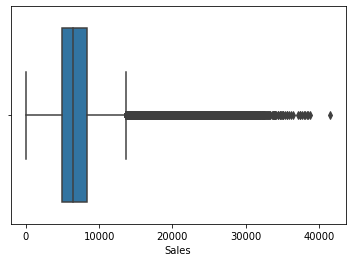

In [40]:
# Sales
sns.boxplot(data['Sales'])

Here, we can observe that there are lot of outliers on Sales data. One resason we could think off is that it could be because for certain stores, there is very high sales. One of the most important assumption of Linear Regression algorithm is that there should be no outliers. <BR>
Hence, we will try to remove these outliers by adjusting these outliers. 
<BR>
Since, the data is right skewed, hence, we will adjust thse data by using Isolation Forest Algorithm available within sklearn.esamble

In [41]:
df1 =data.copy

In [42]:
# importing IsolationForest from sklearn.ensemble
from sklearn.ensemble import IsolationForest

In [43]:
# adding two new columns 'anomaly_score_univariate_sales' and 'outlier_univariate_sales' for Sales
isolation_forest = IsolationForest(n_estimators=100, contamination=0.005)
isolation_forest.fit(data['Sales'].values.reshape(-1, 1))
data['anomaly_score_univariate_sales'] = isolation_forest.decision_function(data['Sales'].values.reshape(-1, 1))
data['outlier_univariate_sales'] = isolation_forest.predict(data['Sales'].values.reshape(-1, 1))

In [44]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,anomaly_score_univariate_sales,outlier_univariate_sales
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0.309872,1
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0.317365,1
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0.279961,1
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,0.122211,1
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,0.298465,1


In [45]:
# Total outliers detected
len(data[data['outlier_univariate_sales']==-1])

4216

In [46]:
data.shape

(844392, 19)

In [47]:
data = data[data['outlier_univariate_sales'] == 1]


In [48]:
data.drop(labels=['anomaly_score_univariate_sales','outlier_univariate_sales'],axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


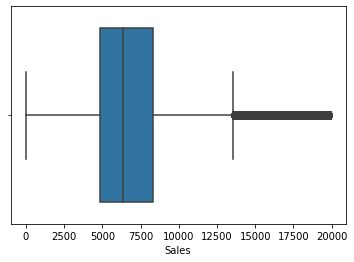

In [49]:
# again plotting sales boxplot
sns.boxplot(data['Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


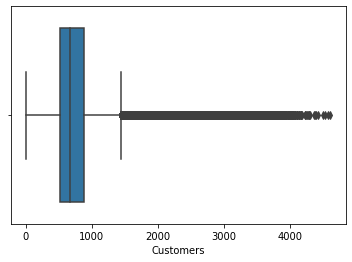

In [50]:
# Customers
sns.boxplot(data['Customers'])

Again we can observe that, again the data is right skewed. Hence we will adjust these outlies as per the higher range of the customers

In [51]:
# Adjusting customer outliers
data['Customers']=np.where(data['Customers']> 1454.0,1454.0,data['Customers'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


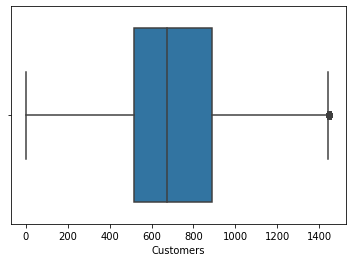

In [52]:
# Again plotting boxplot: Customers
sns.boxplot(data['Customers'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


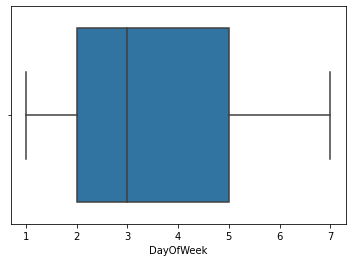

In [53]:
sns.boxplot(data["DayOfWeek"])

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840176 entries, 0 to 844391
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      840176 non-null  int64  
 1   DayOfWeek                  840176 non-null  int64  
 2   Date                       840176 non-null  object 
 3   Sales                      840176 non-null  int64  
 4   Customers                  840176 non-null  float64
 5   Promo                      840176 non-null  int64  
 6   StateHoliday               840176 non-null  object 
 7   SchoolHoliday              840176 non-null  int64  
 8   StoreType                  840176 non-null  object 
 9   Assortment                 840176 non-null  object 
 10  CompetitionDistance        840176 non-null  float64
 11  CompetitionOpenSinceMonth  840176 non-null  float64
 12  CompetitionOpenSinceYear   840176 non-null  float64
 13  Promo2                     84

In [55]:
# date column converting to date type
data["Date"]  = pd.to_datetime(data["Date"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
#date column
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data['WeekOfYear'] = data.Date.dt.isocalendar().week
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year,WeekOfYear
0,1,5,2015-07-31,5263,555.0,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,31,7,2015,31
1,2,5,2015-07-31,6064,625.0,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015,31
2,3,5,2015-07-31,8314,821.0,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015,31
3,4,5,2015-07-31,13995,1454.0,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,31,7,2015,31
4,5,5,2015-07-31,4822,559.0,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,31,7,2015,31


In [57]:
def comp_month(df):
  df['TotalCompetitionMonth'] = 12 * (df.year - df.CompetitionOpenSinceYear) + (df.month - df.CompetitionOpenSinceMonth)

In [59]:
# computing months
comp_month(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
